In [1]:
# Importing libraries and dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import csv
import os

In [19]:
# Study data files
disney_raw_data = "disney_movies_total_gross.csv"

# Read data files
disney_df = pd.read_csv(disney_raw_data)
disney_df.head(5)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [3]:
disney_df.columns = ["Movie", "Release Date", "Genre", "Rating", "Total Gross", "Inflated Gross"]
disney_df

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


In [4]:
# Making a array of genres
genres = disney_df['Genre'].unique()
genres

array(['Musical', 'Adventure', 'Drama', 'Comedy', nan, 'Action', 'Horror',
       'Romantic Comedy', 'Thriller/Suspense', 'Western', 'Black Comedy',
       'Documentary', 'Concert/Performance'], dtype=object)

In [5]:
disney_count = pd.DataFrame(disney_df.groupby('Genre').count()['Movie'])
disney_count

,Movie
Genre,
Action,40
Adventure,129
Black Comedy,3
Comedy,182
Concert/Performance,2
Documentary,16
Drama,114
Horror,6
Musical,16


In [6]:
# Group genre with average inflated gross
avg_gross_per_genre = pd.DataFrame(disney_df.groupby('Genre').mean()['Inflated Gross'])
avg_gross_clean = round((avg_gross_per_genre),1)
avg_gross_clean

,Inflated Gross
Genre,
Action,137473419.6
Adventure,190397412.1
Black Comedy,52243491.7
Comedy,84667730.3
Concert/Performance,57410839.0
Documentary,12718026.1
Drama,71893021.8
Horror,23413848.7
Musical,603597861.0


Text(0, 0.5, 'Average Inflated Gross (1e8)')

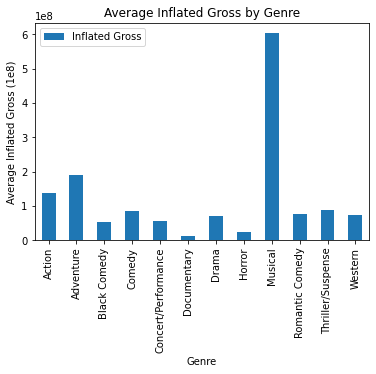

In [13]:
avg_gross_clean.plot.bar()
plt.title('Average Inflated Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Inflated Gross (1e8)')

In [8]:
# Count amount of movies per rating
avg_gross_per_rating = pd.DataFrame(disney_df.groupby('Rating').count()['Movie'])
avg_gross_per_rating.columns = ['Total Movies']
avg_gross_per_rating

,Total Movies
Rating,
G,86
Not Rated,3
PG,187
PG-13,145
R,102


In [11]:
# Group rating with average inflated gross
avg_rating = pd.DataFrame(disney_df.groupby('Rating').mean()['Inflated Gross'])
avg_rating_clean = round((avg_rating),1)
avg_rating_clean

,Inflated Gross
Rating,
G,291260995.0
Not Rated,299873412.7
PG,101541433.6
PG-13,102948584.0
R,55305805.5


Text(0, 0.5, 'Average Inflated Gross (1e8)')

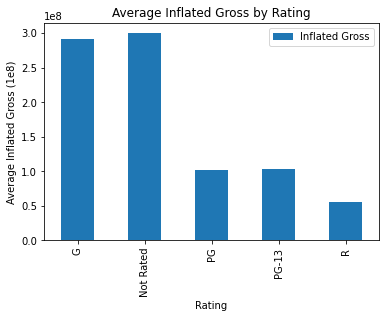

In [12]:
avg_rating_clean.plot.bar()
plt.title('Average Inflated Gross by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Inflated Gross (1e8)')